<a href="https://colab.research.google.com/github/parisadikshit/S-99/blob/main/KNN_with_modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN using scikit-learn KNeighborsClassifier


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
data = pd.DataFrame(np.c_[iris['data'],iris['target']],
                             columns=iris['feature_names']+['target'])

In [6]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
X = data.drop('target',axis=1).values

In [10]:
y = data['target'].values

In [11]:
#preparing test nd training set
from sklearn.model_selection import train_test_split


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)

In [13]:
print(X_train.shape,X_test.shape)

(90, 4) (60, 4)


In [14]:
print(y_train.shape,y_test.shape)

(90,) (60,)


In [15]:
num_of_neighbors = np.arange(1,20)

In [16]:
train_accuracy = np.empty(len(num_of_neighbors))
test_accuracy = np.empty(len(num_of_neighbors))

In [17]:
for i,k in enumerate(num_of_neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  train_accuracy[i] = knn.score(X_train,y_train)
  test_accuracy[i] = knn.score(X_test,y_test)

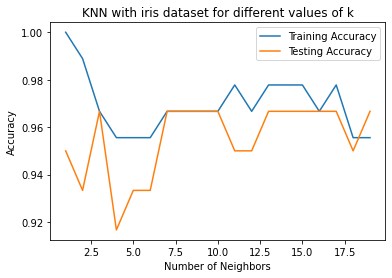

In [18]:
#plotting
plt.title('KNN with iris dataset for different values of k')
plt.plot(num_of_neighbors,train_accuracy,label='Training Accuracy')
plt.plot(num_of_neighbors,test_accuracy,label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix,classification_report

k=8 seems fine

In [20]:
knn = KNeighborsClassifier(n_neighbors=8)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [22]:
knn.score(X_train,y_train)

0.9666666666666667

In [23]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)


0.9666666666666667

In [24]:
knn.score(X_test,y_test)

0.9666666666666667

In [25]:
y_pred = knn.predict(X_test)

In [26]:
confusion_matrix(y_test,y_pred)

array([[20,  0,  0],
       [ 0, 20,  0],
       [ 0,  2, 18]])

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       0.91      1.00      0.95        20
         2.0       1.00      0.90      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [28]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0.0,1.0,2.0,All
True,,,,
0.0,20,0,0,20
1.0,0,20,0,20
2.0,0,2,18,20
All,20,22,18,60


Another way of finding k- GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [31]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
knn_cv.best_score_

0.9800000000000001

In [33]:
knn_cv.best_params_

{'n_neighbors': 6}